In [353]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import pprint

In [354]:
df = pd.read_csv("..\OMLT_ML\data\polynomial3.csv")
df.head()

,theta,z,u
0,-20.0,-6.08,-3.92
1,-19.5,-5.58,-4.42
2,-19.1,-5.13,-4.87
3,-18.6,-4.71,-5.29
4,-18.1,-4.32,-5.68


In [355]:
X = df["theta"]
y = df["z"]

X = X.reset_index(drop = True)
y = y.reset_index(drop = True)

X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

In [356]:
X.shape, y.shape

((180, 1), (180, 1))

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

train_data_linear = lgb.Dataset(X_train, label=y_train,
                        params={
                            'linear_tree': True
                        })

train_data_normal = lgb.Dataset(X_train, label=y_train)

In [358]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "max_depth": 3,
    "num_leaves": 30,
    "learning_rate": 1,
    "verbosity": -1
}

model_linear = lgb.train(params, train_data_linear)
model_normal = lgb.train(params, train_data_normal)

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\basic.py:154: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [359]:
y_pred_linear = model_linear.predict(X_test, num_iteration=model_linear.best_iteration)
y_pred_normal = model_normal.predict(X_test, num_iteration=model_normal.best_iteration)

In [360]:
print(f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
print(f"Normal trees error: {round(mean_squared_error(y_test, y_pred_normal),3)}")

Linear trees error: 0.025
Normal trees error: 0.364


In [361]:
y_linear = model_linear.predict(X, num_iteration=model_linear.best_iteration)
y_normal = model_normal.predict(X, num_iteration=model_linear.best_iteration)

In [362]:
y_linear

array([-5.31971636, -5.06806869, -4.86675056, -4.6151029 , -4.36345524,
       -4.11180757, -3.91048944, -3.65884178, -3.40719412, -3.15554645,
       -2.95422832, -2.70258066, -2.45093299, -2.19928533, -1.9979672 ,
       -1.74631954, -1.49467187, -1.24302421, -1.04170608, -0.79005842,
       -0.53841075, -0.28676309, -0.06028019,  0.17626861,  0.41785037,
       -0.08115353, -0.10397957, -0.12633007,  0.21759781,  0.2105173 ,
        0.20328615,  0.19620563,  0.53243408,  0.52089077,  0.50910186,
        0.80075175,  0.78771215,  0.7743951 ,  0.7613555 ,  0.77111866,
        0.75011509,  0.72870932,  0.24659662, -0.04490045, -0.13367676,
       -0.22263996, -0.52281723, -0.61867266, -0.7125311 , -1.01620176,
       -1.11161091, -1.20905005, -1.30445921, -1.40189835, -1.4973075 ,
       -1.59474664, -1.89787385, -2.01344771, -2.12661378, -2.24218764,
       -2.58700574, -2.67594648, -2.76303429, -2.85197502, -2.94091576,
       -3.45603412, -3.5062237 , -3.56896067, -3.63169764, -3.55

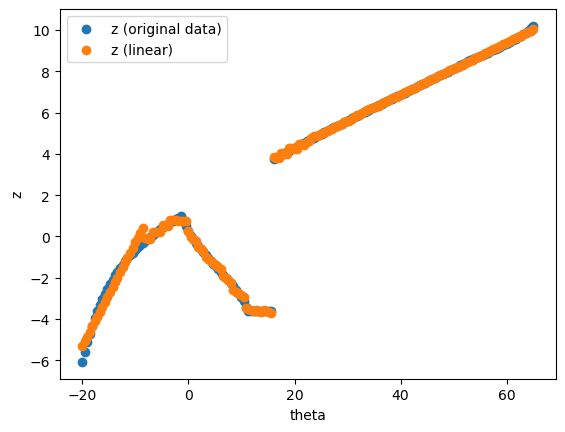

In [363]:
# plotting results
plt.scatter(X, y, label = 'z (original data)')
plt.scatter(X, y_linear, label = 'z (linear)')
# plt.scatter(X, y_normal, label = 'z (normal)')
plt.ylabel('z')
plt.xlabel('theta')
plt.legend()
plt.show()